# Google Vertex Generative AI Ideation with PaLM 2 and Langchain

Copyright 2023, Denis Rothman

This notebook implements an educational example of automated ideation beyon human designed prompts:

**1.Generative AI** creates the prompts as an output  
**2.Stable Diffusion** creates an image using the automated prompts as the input


### Costs

This notebook uses billable components of Google Cloud:

* Vertex AI Generative AI Studio

Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing),
and use the [Pricing Calculator](https://cloud.google.com/products/calculator/)
to generate a cost estimate based on your projected usage.

Activate GPU

In [ ]:
!nvidia-smi

Tue Aug  8 14:53:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 1.Automated Ideation with Generative AI

Run the notebook cell by cell to make sure you have a stable run.

## Install Vertex AI SDK

In [ ]:
!pip install google-cloud-aiplatform --upgrade --user

**Colab only:** Run the following cell to restart the kernel or use the button to restart the kernel. For Vertex AI Workbench you can restart the terminal using the button on top.

In [ ]:
# Automatically restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

Make sure the notebook was restarted if you encounter an issue when initializing your PROJECT ID

## Authenticating your notebook environment
* If you are using **Colab** to run this notebook, uncomment the cell below and continue.
* If you are using **Vertex AI Workbench**, check out the setup instructions [here](https://github.com/GoogleCloudPlatform/generative-ai/tree/main/setup-env).

In [ ]:
from google.colab import auth
auth.authenticate_user()

## Retrieving your Google Cloud PROJECT_ID
This is only necessary to initialize the Vertex AI SDK.  
You don't need to use Google Drive. You can use another
methode to retrieve your Google Cloud PROJECT_ID or enter it
directly in the notebook.

In [ ]:
# Mounting Google Drive for the entire notebook
# goal: read and write files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Store your Project ID  in a file and read it(you can type it directly in the notebook but it will be visible for somebody next to you)
f = open("drive/MyDrive/files/GPID.txt", "r")
PROJECT_ID=f.readline()
f.close()

## Import libraries


**Colab only:** Use the following cell to initialize the Vertex AI SDK. For Vertex AI Workbench, you don't need to run this.  

In [ ]:
import vertexai
#PROJECT_ID = "[your-project-id]"  # @param {type:"string"}

vertexai.init(project=PROJECT_ID, location="us-central1")

In [ ]:
from vertexai.preview.language_models import TextGenerationModel

## Import model

In [ ]:
generation_model = TextGenerationModel.from_pretrained("text-bison@001")

## Ideation

### Prompt generation

The goal is to obtain a text for a text-to-image task

In [ ]:
prompt = "Give me 5 sustainability image generation ideas associated with nature with no humans at all in the text with a fantastic medieval castle in a beautiful rain forest for text-to-image generation:"

# Create an empty list to store the outputs
outputs = []

# Generate 5 outputs
output = generation_model.predict(
  prompt, temperature=0.2, max_output_tokens=1024, top_k=1, top_p=0.8
 ).text
outputs.append(output)

# Print the outputs
for output in outputs:
    print(output)

1. A majestic castle nestled in the lush green mountains of a rainforest. The castle is made of stone and wood, and its turrets and towers reach up into the sky. The rainforest is full of lush vegetation, and there are many different types of trees, plants, and flowers. The air is filled with the sound of birdsong and the smell of the forest.
2. A group of animals gathered around a watering hole in the rainforest. The animals include a deer, a monkey, a bird, and a fish. The animals are all drinking from the water hole, and they are all enjoying the cool water. The rainforest is lush and green, and the sun is shining brightly.
3. A waterfall cascading down a cliff in the rainforest. The waterfall is surrounded by lush vegetation, and the water is crystal clear. The sound of the waterfall is peaceful and relaxing. The rainforest is full of life, and there are many different types of animals and plants.
4. A group of people hiking through the rainforest. The people are all wearing hiking

### Prompt output processing

Saving the outputs for the text-to-image generation

In [ ]:
with open("image2text.txt", "w") as f:
    for output in outputs:
        f.write(output + "\n")

Preparing the text-to-image function

In [ ]:
with open("image2text.txt", "r") as f:
    lines = f.readlines()

for line in lines:
    prompt = line.strip()
    print(prompt)

1. A majestic castle nestled in the lush green mountains of a rainforest. The castle is made of stone and wood, and its turrets and towers reach up into the sky. The rainforest is full of lush vegetation, and there are many different types of trees, plants, and flowers. The air is filled with the sound of birdsong and the smell of the forest.
2. A group of animals gathered around a watering hole in the rainforest. The animals include a deer, a monkey, a bird, and a fish. The animals are all drinking from the water hole, and they are all enjoying the cool water. The rainforest is lush and green, and the sun is shining brightly.
3. A waterfall cascading down a cliff in the rainforest. The waterfall is surrounded by lush vegetation, and the water is crystal clear. The sound of the waterfall is peaceful and relaxing. The rainforest is full of life, and there are many different types of animals and plants.
4. A group of people hiking through the rainforest. The people are all wearing hiking

If the output begins with numbers such as "1.", we need to strip the line to make sure the prompt does not contain numbers.

In [ ]:
import re

with open("image2text.txt", "r") as f:
    lines = f.readlines()

for line in lines:
    prompt = line.strip()
    prompt = re.sub(r"\d+\. ", "", prompt)
    print(prompt)

A majestic castle nestled in the lush green mountains of a rainforest. The castle is made of stone and wood, and its turrets and towers reach up into the sky. The rainforest is full of lush vegetation, and there are many different types of trees, plants, and flowers. The air is filled with the sound of birdsong and the smell of the forest.
A group of animals gathered around a watering hole in the rainforest. The animals include a deer, a monkey, a bird, and a fish. The animals are all drinking from the water hole, and they are all enjoying the cool water. The rainforest is lush and green, and the sun is shining brightly.
A waterfall cascading down a cliff in the rainforest. The waterfall is surrounded by lush vegetation, and the water is crystal clear. The sound of the waterfall is peaceful and relaxing. The rainforest is full of life, and there are many different types of animals and plants.
A group of people hiking through the rainforest. The people are all wearing hiking gear, and t

The following code is for Google Drive usage for a project. You can save the prompts for further use without running the Ideation again.

In [ ]:
!cp image2text.txt  "drive/MyDrive/files/image2text.txt"

# 2.Image Creation with Stable Diffusion

Next, you should install `diffusers` as well `scipy`, `ftfy` and `transformers`. `accelerate` is used to achieve much faster loading.

In [ ]:
!pip install diffusers==0.11.1 -qq
!pip install transformers scipy ftfy accelerate -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.2 MB/s eta 0:00:00


## Stable Diffusion Pipeline

`StableDiffusionPipeline` is an end-to-end inference pipeline that you can use to generate images from text with just a few lines of code.


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

text_encoder/pytorch_model.fp16.safetensors not found


Fetching 28 files:   0%|          | 0/28 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Moving the pipeline to GPU to have faster inference.

In [ ]:
pipe = pipe.to("cuda")

## Retrieving the ideation outputs

Retrieving Ideation prompts inferred by Google Vertex AI PaLM 2 for text2image prompt creation

The following code is for Google Drive usage for a project

In [ ]:
!cp "drive/MyDrive/files/image2text.txt" image2text.txt

## Create a text-to-image function

In [ ]:
def text2image(prompt):
  image=pipe(prompt).images[0]
  return image

### Generating images

*Generating images with the prompts  
*Creating 3 variations of the first prompt   
*displaying the images in a grid   



In [ ]:
import re
import PIL.Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = PIL.Image.new('RGB', size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid


# Path of the Ideation file containing text prompts
with open("image2text.txt", "r") as f:
    lines = f.readlines()

images = []
for line in lines:
    prompt = line.strip()
    prompt = re.sub(r"\d+\. ", "", prompt)
    img = text2image(prompt)
    images.append(img)

# Add 3 extra images with variations
line1 = lines[0];line1.strip()
img1 = text2image(line1)
img2 = text2image(line1)
img3 = text2image(line1)
images.append(img1)
images.append(img2)
images.append(img3)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (78 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


  0%|          | 0/50 [00:00<?, ?it/s]

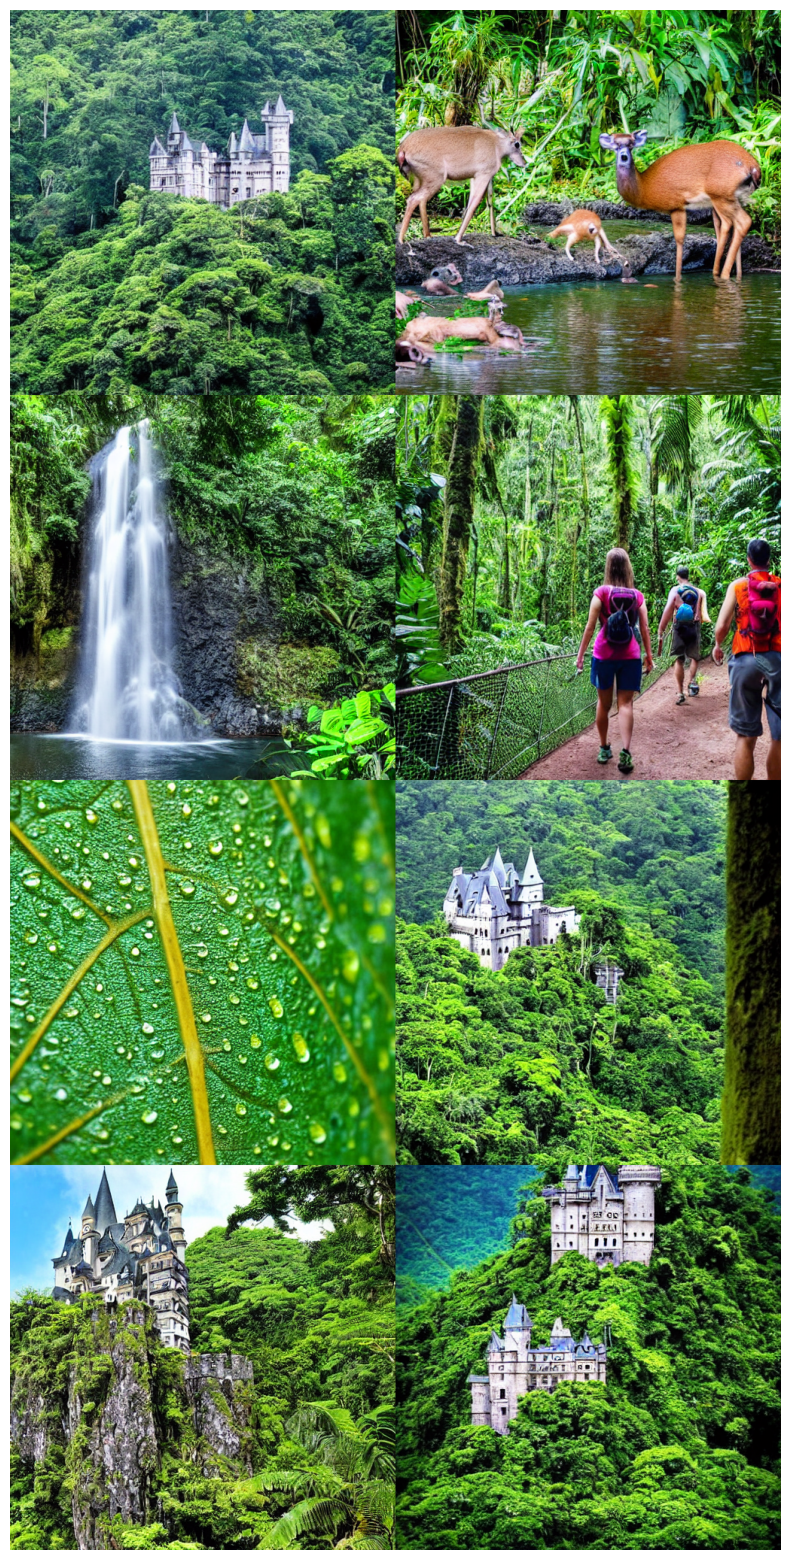

In [ ]:
import matplotlib.pyplot as plt
import math

# Determine rows and cols for the grid
total_images = len(images)
cols = int(math.sqrt(total_images))
rows = total_images // cols + (1 if total_images % cols else 0)

grid = image_grid(images, rows, cols)

# Display the grid using matplotlib
plt.figure(figsize=(20,20))  # Adjust the size as necessary
plt.imshow(grid)
plt.axis('off')  # This will turn off the axis numbers and ticks
plt.show()